In [2]:
import pandas as pd
import glob
import os
import gzip
import datetime



from src.creds import mex_root, mex_col_call

idx_date = mex_col_call.index('date')
idx_time = mex_col_call.index('time')
idx_duration = mex_col_call.index('duration')


In [8]:
%matplotlib inline

In [21]:
def countlines(fns):
    nlines_wrongdate = {}
    nlines_largedur = {}

    for fn in fns:
        file_date = os.path.basename(fn).replace('.dat.gz','')
        wrongdate = 0
        largedur = 0
        with gzip.open(fn) as fin:
            for line in fin:
                line = line.decode('utf8').strip().split('|')
                # get datetime of start and end
                dt1 = datetime.datetime.strptime(line[idx_date] + ' ' + line[idx_time], '%d/%m/%Y %H:%M:%S')
                dur = int(line[idx_duration])
                # get the date and hour of the datetime
                d1 = dt1.strftime('%Y-%m-%d')
                # the startdate is not the file date or the duration is larger than 2hours
                if d1 != file_date:
                    wrongdate+=1
                if dur > 7200:
                    largedur +=1

        nlines_wrongdate[file_date]=wrongdate
        nlines_largedur[file_date]=largedur
    return nlines_wrongdate, nlines_largedur

# ent incoming calls

In [27]:
num_call_daily_ent = pd.read_csv('stats/MexNoTwCallPcntDailyVOZENTRANTE.csv',index_col=0)

In [28]:
fns_ent = [fn for fn in glob.glob('stats/DQMexTimeAnomalyVOZENTRANTE/*.gz')]
fns_ent = sorted(fns_ent)

In [30]:
nlines_wrongdate_ent, nlines_largedur_ent = countlines(fns_ent)

In [37]:
num_call_daily_ent['wrongdate'] = pd.Series(nlines_wrongdate_ent)
num_call_daily_ent['largedur'] = pd.Series(nlines_largedur_ent)

## wrong dates

In [38]:
num_call_daily_ent[num_call_daily_ent['wrongdate']!=0]

,all,nt1,nt2,nt12,nt1pct,nt2pct,nt12pct,wrongdate,largedur
2010-05-31,10551035,10551035,2667333,2667333,1.0,0.252803,0.252803,10551035,3415
2010-06-01,10610985,10610985,2687960,2687960,1.0,0.253319,0.253319,10610985,3360



2010-05-31 and 06-01 has wrong date in calls:
- 2010-05-31 has the same calls as 2010-06-03
- 2010-06-01 has the same calls as 2010-06-02

In [44]:
num_call_daily_ent.loc[['2010-06-03', '2010-05-31', '2010-06-02', '2010-06-01']]

,all,nt1,nt2,nt12,nt1pct,nt2pct,nt12pct,wrongdate,largedur
2010-06-03,10551035,10551035,2667333,2667333,1.0,0.252803,0.252803,0,3415
2010-05-31,10551035,10551035,2667333,2667333,1.0,0.252803,0.252803,10551035,3415
2010-06-02,10610985,10610985,2687960,2687960,1.0,0.253319,0.253319,0,3360
2010-06-01,10610985,10610985,2687960,2687960,1.0,0.253319,0.253319,10610985,3360


In [1]:
import gzip, json

In [14]:
get_set = lambda data: {d:{u:set(c) for u,c in v.items()} for d, v in data.items()}

In [5]:
d0531 = json.load(gzip.open('stats/AggMexTwDyHrUnqUsrVOZENTRANTE/2010-05-31.json.gz'))
d0603 = json.load(gzip.open('stats/AggMexTwDyHrUnqUsrVOZENTRANTE/2010-06-03.json.gz'))

d0602 = json.load(gzip.open('stats/AggMexTwDyHrUnqUsrVOZENTRANTE/2010-06-02.json.gz'))
d0601 = json.load(gzip.open('stats/AggMexTwDyHrUnqUsrVOZENTRANTE/2010-06-01.json.gz'))

In [22]:
print('wrong dates')
print(d0531.keys())
print(d0601.keys())

dict_keys(['2010-06-03', '2010-06-04'])
dict_keys(['2010-06-02', '2010-06-03'])


In [23]:
print('the aggregate of MexTwDyHrUnqUsr are the same')
get_set(d0531) == get_set(d0603), get_set(d0601) == get_set(d0602)

the aggregate of MexTwDyHrUnqUsr are the same


(True, True)

## large duration calls percentage

count     122.000000
mean     3961.959016
std       706.946377
min      2950.000000
25%      3425.000000
50%      3721.000000
75%      4678.000000
max      5541.000000
Name: largedur, dtype: float64

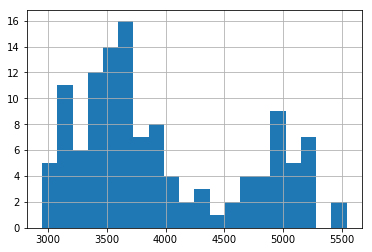

In [39]:
num_call_daily_ent.largedur.hist(bins=20)
num_call_daily_ent.largedur.describe()

count    12200.00%
mean         0.04%
std          0.01%
min          0.03%
25%          0.03%
50%          0.03%
75%          0.04%
max          0.06%
dtype: object

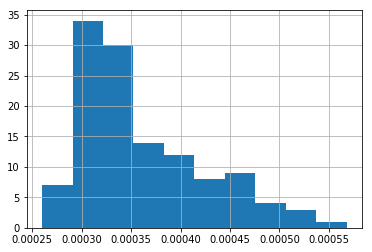

In [40]:
dur_pcnt_ent = num_call_daily_ent.largedur/num_call_daily_ent['all']
dur_pcnt_ent.hist()
dur_pcnt_ent.describe().apply(lambda x: f"{x:.02%}")

# out calls

In [22]:
num_call_daily = pd.read_csv('stats/MexNoTwCallPcntDaily.csv',index_col=0)

In [23]:
fns = [fn for fn in glob.glob('stats/DQMexTimeAnomalyVOZ/*.gz')]
fns = sorted(fns)

In [24]:
nlines_wrongdate, nlines_largedur = countlines(fns)

In [25]:
num_call_daily['wrongdate'] = pd.Series(nlines_wrongdate)
num_call_daily['largedur'] = pd.Series(nlines_largedur)

In [26]:
(num_call_daily['wrongdate']!=0).mean()

0.0

count      245.000000
mean      6330.293878
std       2453.503526
min       1996.000000
25%       5545.000000
50%       6181.000000
75%       6800.000000
max      41560.000000
Name: largedur, dtype: float64

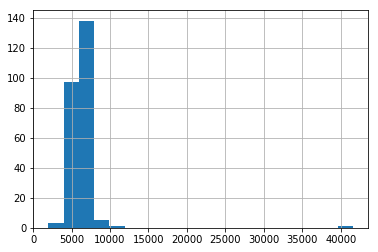

In [17]:
num_call_daily.largedur.hist(bins=20)
num_call_daily.largedur.describe()

count    24500.00%
mean         0.02%
std          0.01%
min          0.01%
25%          0.02%
50%          0.02%
75%          0.03%
max          0.16%
dtype: object

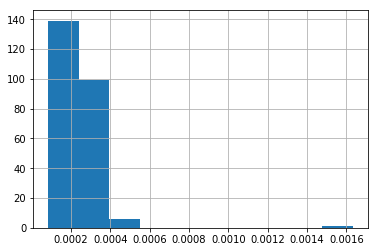

In [20]:
dur_pcnt = num_call_daily.largedur/num_call_daily['all']
dur_pcnt.hist()
dur_pcnt.describe().apply(lambda x: f"{x:.02%}")